In [40]:
import pandas as pd
import numpy as np
import plotly.express as p
import matplotlib.pyplot as plt
from pathlib import Path

# Construct the full path using Path and forward slash
src_file = Path("/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/asset_cropland-fires_emissions.csv")

# Read the CSV file into a DataFrame
df = pd.read_csv(src_file)

# Display the first 5 rows of the DataFrame
# df.head()

In [42]:
row_count = len(df)
print(f'The number of rows in the file is: {row_count}')

The number of rows in the file is: 9999495


In [44]:
# Replace 'column_name' with the actual column name you're interested in
distinct_values = df["iso3_country"].unique()
print(distinct_values)

['USA' 'URY' 'UGA' 'TUR' 'TZA' 'RUS' 'KEN' 'KAZ' 'CHN' 'ETH' 'CAN' 'BRA'
 'BIH' 'VNM' 'BGR' 'TWN' 'SDN' 'IRQ' 'IND' 'HTI' 'ARG' 'PRY' 'PAK' 'MEX'
 'GIN' 'ZAF' 'ECU' 'AUS' 'VEN' 'SRB' 'THA' 'MNE' 'GBR' 'PRT' 'NIC' 'NGA'
 'MOZ' 'GHA' 'UKR' 'FIN' 'SAU' 'COL' 'DEU' 'AZE' 'ZMB' 'IRN' 'GEO' 'MMR'
 'DZA' 'TKM' 'CAF' 'AGO' 'COD' 'SOM' 'MDG' 'BOL' 'BFA' 'CIV' 'HUN' 'EGY'
 'ESP' 'UZB' 'ROU' 'AFG' 'MDA' 'AUT' 'TCD' 'CUB' 'MWI' 'JPN' 'IDN' 'ZWE'
 'SYR' 'NPL' 'NER' 'HND' 'ERI' 'CZE' 'MKD' 'SLE' 'MLI' 'CHL' 'BGD' 'ITA'
 'DNK' 'LTU' 'LVA' 'PRK' 'LAO' 'PNG' 'MAR' 'POL' 'NAM' 'GNB' 'MYS' 'FRA'
 'NZL' 'GTM' 'SWE' 'CMR' 'LSO' 'KHM' 'HRV' 'PHL' 'NLD' 'JOR' 'KOR' 'COG'
 'CHE' 'MRT' 'BWA' 'BEN' 'LBY' 'SEN' 'SSD' 'CRI' 'TLS' 'BLR' 'GRC' 'PER'
 'NOR' 'LBR' 'PRI' 'KGZ' 'XKX' 'SVN' 'EST' 'BHS' 'Z01' 'SVK' 'LKA' 'TGO'
 'LBN' 'YEM' 'TUN' 'GMB' 'GUF' 'LUX' 'DOM' 'ISR' 'TTO' 'RWA' 'BEL' 'XCA'
 'ALB' 'GNQ' 'PAN' 'BRN' 'SWZ' 'MNG' 'ARM' 'SUR' 'SLV' 'PSE' 'Z06' 'BTN'
 'FJI' 'Z07' 'SMR' 'OMN' 'ZNC' 'GUY' 'IRL' 'TJK' 'B

In [46]:
# For multiple columns
distinct_values_multiple = df[["temporal_granularity"]].drop_duplicates()
print(distinct_values_multiple)

  temporal_granularity
0                month


In [48]:
# Replace 'column_name' with the actual column name you're interested in
distinct_values = df["gas"].unique()
print(distinct_values)


['co2' 'ch4' 'n2o' 'co2e_100yr' 'co2e_20yr']


In [ ]:
# Replace 'column_name' with the actual column name you're interested in
distinct_values = df["asset_name"].unique()
print(distinct_values)

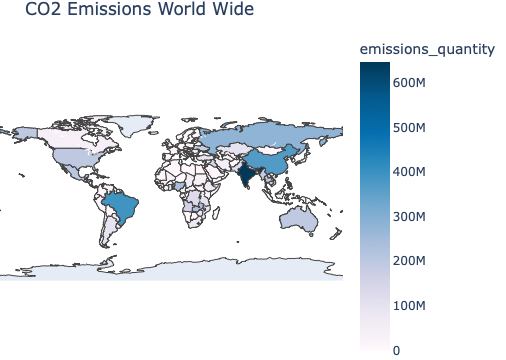

In [50]:
# interactive world map similar to the one in the provided image, highlighting CO2 emissions for each country based on your dataset.

# Ensure necessary columns are present (like iso3_country and emissions_quantity)
if 'iso3_country' in df.columns and 'emissions_quantity' in df.columns:
    # Group by country to sum emissions (if multiple entries exist per country)
    country_emissions = df.groupby('iso3_country', as_index=False)['emissions_quantity'].sum()

    # Create the choropleth map
    fig = px.choropleth(
        country_emissions,
        locations="iso3_country",  # ISO 3166-1 alpha-3 country codes
        color="emissions_quantity",  # Data column to color by
        hover_name="iso3_country",  # Country name in hover tooltip
        title="CO2 Emissions World Wide",
        color_continuous_scale=px.colors.sequential.PuBu,  # Adjust color scale as needed
    )

    # Update layout for better appearance
    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True, projection_type="equirectangular"),
        margin={"r":0,"t":30,"l":0,"b":0},
    )

    # Show the map
    fig.show()
else:
    print("Required columns 'iso3_country' or 'emissions_quantity' are missing from the dataset.")


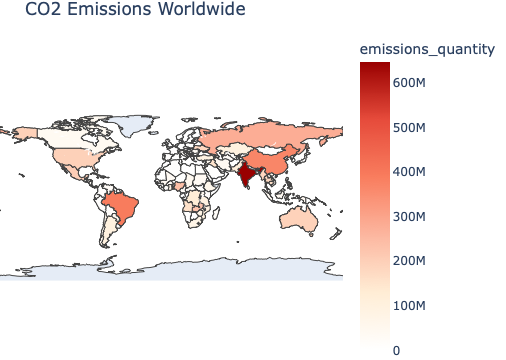

In [56]:
if 'iso3_country' in df.columns and 'emissions_quantity' in df.columns:
    # Group by country to sum emissions (if multiple entries exist per country)
    country_emissions = df.groupby('iso3_country', as_index=False)['emissions_quantity'].sum()

    # Define custom color scale inspired by the provided map
    custom_color_scale = [
        [0.0, "#ffffff"],  # Lightest (low emissions)
        [0.2, "#ffedd5"],  # Very light orange
        [0.4, "#fcb69f"],  # Light orange
        [0.6, "#f97d5e"],  # Medium orange
        [0.8, "#e64b3b"],  # Dark orange
        [1.0, "#990000"],  # Deep red (highest emissions)
    ]

    # Create the choropleth map
    fig = px.choropleth(
        country_emissions,
        locations="iso3_country",  # ISO 3166-1 alpha-3 country codes
        color="emissions_quantity",  # Data column to color by
        hover_name="iso3_country",  # Country name in hover tooltip
        title="CO2 Emissions Worldwide",
        color_continuous_scale=custom_color_scale,  # Apply custom color scale
    )

    # Update layout for better appearance
    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True, projection_type="equirectangular"),
        margin={"r": 0, "t": 30, "l": 0, "b": 0},
    )

    # Show the map
    fig.show()
else:
    print("Required columns 'iso3_country' or 'emissions_quantity' are missing from the dataset.")



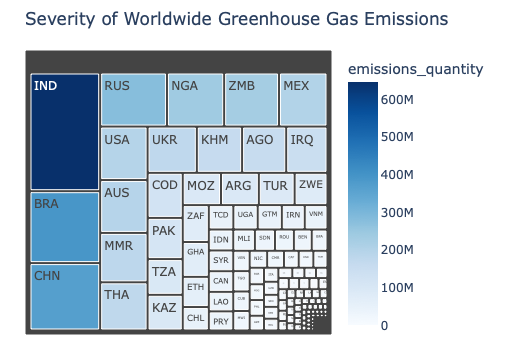

In [52]:
# Group data by country and sum emissions
country_emissions = df.groupby('iso3_country')['emissions_quantity'].sum().reset_index()

# Create a treemap
fig = px.treemap(
    country_emissions,
    path=['iso3_country'],  # Define the hierarchy (only country in this case)
    values='emissions_quantity',  # Size of the rectangles
    title="Severity of Worldwide Greenhouse Gas Emissions",
    color='emissions_quantity',  # Color based on emissions quantity
    color_continuous_scale=px.colors.sequential.Blues  # Use a color scale for visual impact
)

# Customize the layout for better appearance
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the treemap
fig.show()


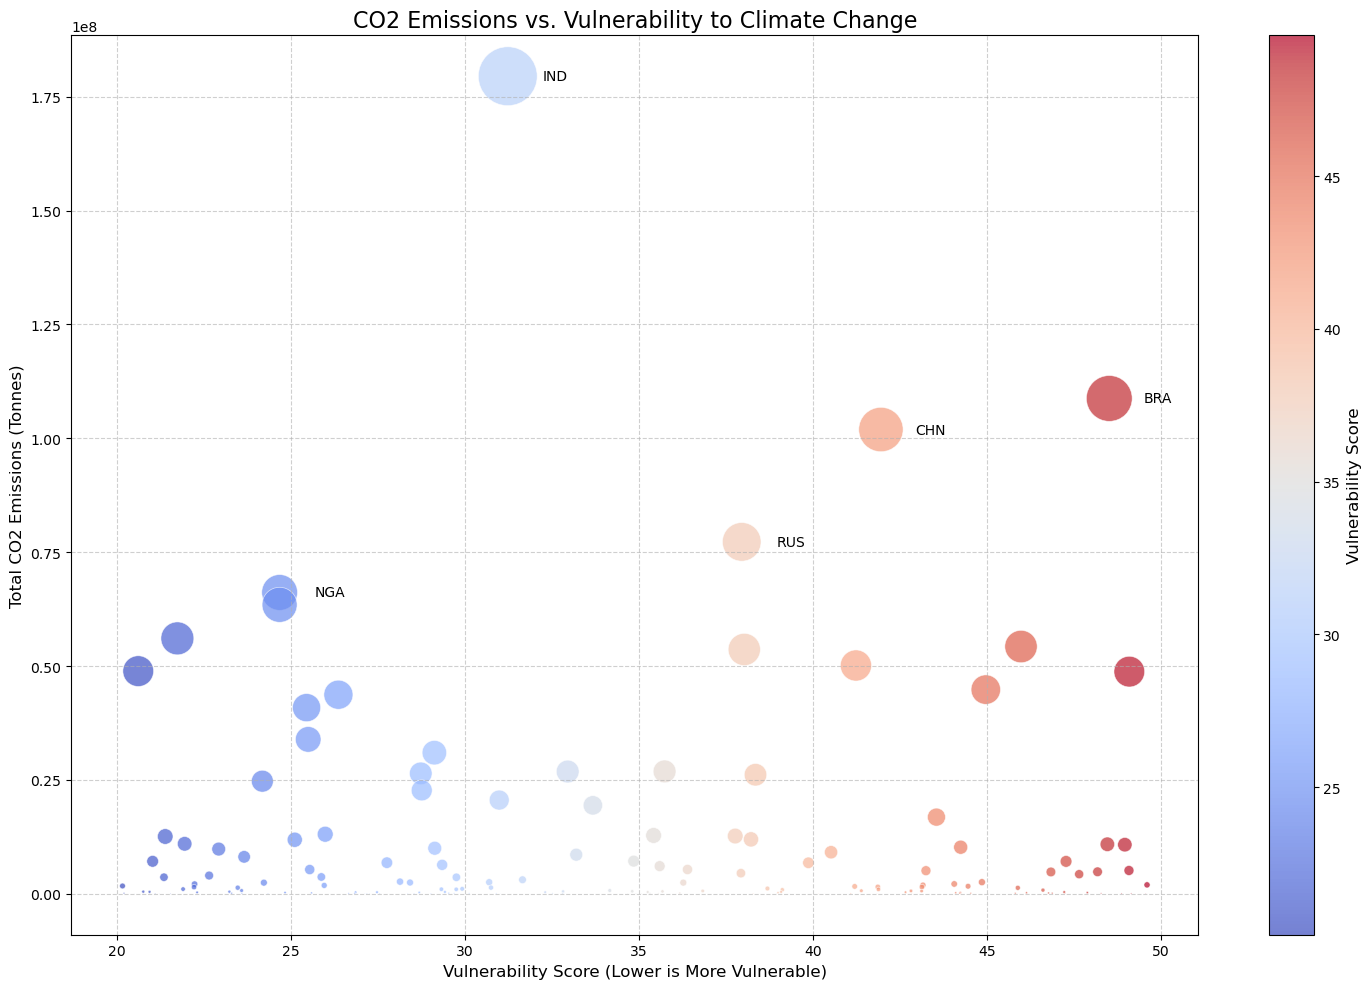

In [54]:
# Read the CSV file into a DataFrame
data = pd.read_csv(src_file)

# Summarize emissions by country and gas type
emissions_summary = data.groupby(['iso3_country', 'gas']).agg(
    total_emissions=('emissions_quantity', 'sum')
).reset_index()

# Filter only CO2 data
co2_emissions = emissions_summary[emissions_summary['gas'] == 'co2']
co2_emissions = co2_emissions.sort_values(by='total_emissions', ascending=False).reset_index()

# Create mock vulnerability scores for visualization purposes
np.random.seed(42)
co2_emissions['vulnerability_score'] = np.random.uniform(20, 50, len(co2_emissions))

# Plotting CO2 Emissions vs. Vulnerability Scores
fig, ax = plt.subplots(figsize=(15, 10))

# Scatter plot: size represents emissions, color represents vulnerability score
bubble_sizes = co2_emissions['total_emissions'] / 1e5  # Scale bubble size
scatter = ax.scatter(
    co2_emissions['vulnerability_score'],
    co2_emissions['total_emissions'],
    s=bubble_sizes,
    c=co2_emissions['vulnerability_score'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors="w",
    linewidth=0.5,
)

# Adding a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Vulnerability Score", fontsize=12)

# Add labels, title, and grid
ax.set_title("CO2 Emissions vs. Vulnerability to Climate Change", fontsize=16)
ax.set_xlabel("Vulnerability Score (Lower is More Vulnerable)", fontsize=12)
ax.set_ylabel("Total CO2 Emissions (Tonnes)", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Annotate top emitters
top_emitters = co2_emissions.head(5)
for _, row in top_emitters.iterrows():
    ax.text(
        row['vulnerability_score'] + 1, row['total_emissions'], 
        row['iso3_country'], fontsize=10, ha='left', va='center'
    )

plt.tight_layout()
plt.show()


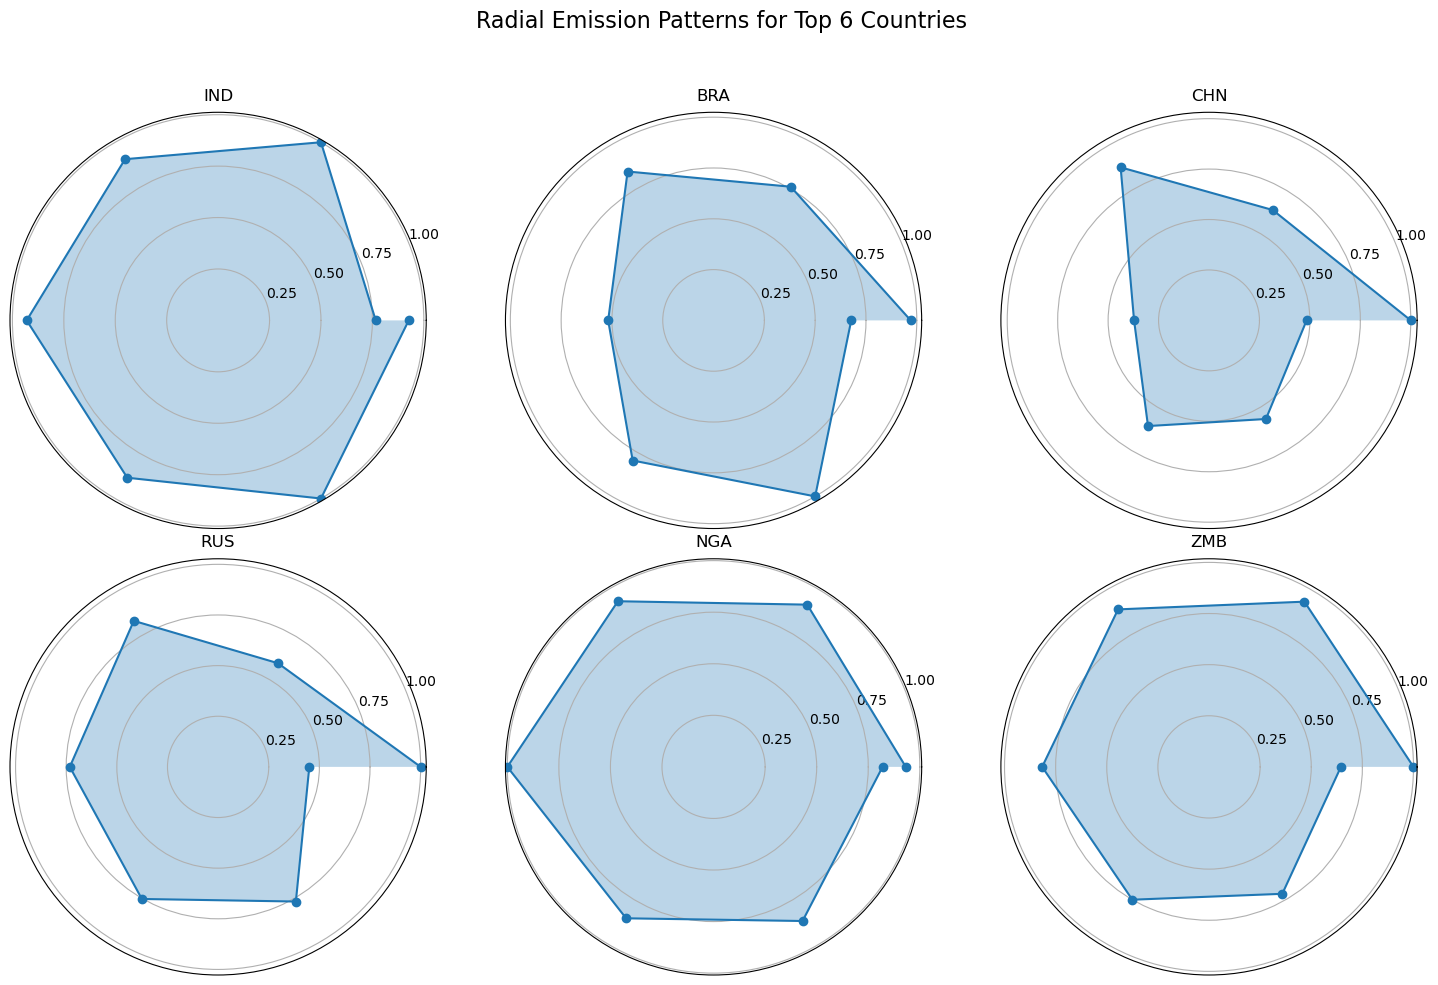

In [58]:
# Select the top countries and prepare for radial visualization
top_countries_list = top_countries['iso3_country'].tolist()

# Data preparation for radial visualization
radial_data = top_countries_data[top_countries_data['iso3_country'].isin(top_countries_list)]
radial_data_grouped = radial_data.groupby(['iso3_country', 'year']).agg(
    total_emissions=('emissions_quantity', 'sum')
).reset_index()

# Create radial plots for each country
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': 'polar'})
axs = axs.flatten()

for i, country in enumerate(top_countries_list):
    country_data = radial_data_grouped[radial_data_grouped['iso3_country'] == country]
    years = country_data['year']
    emissions = country_data['total_emissions']
    
    # Normalize emissions for radial representation
    emissions_normalized = emissions / emissions.max()
    
    # Generate angles for each year
    angles = np.linspace(0, 2 * np.pi, len(years))
    
    # Plot radial visualization
    ax = axs[i]
    ax.plot(angles, emissions_normalized, marker='o', label=f'{country}')
    ax.fill(angles, emissions_normalized, alpha=0.3)
    
    # Add country label and radial grid
    ax.set_title(f"{country}", va='bottom', fontsize=12)
    ax.set_rticks([0.25, 0.5, 0.75, 1])  # Radial ticks
    ax.set_xticks([])  # Remove angular ticks

# Adjust layout
fig.suptitle("Radial Emission Patterns for Top 6 Countries", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


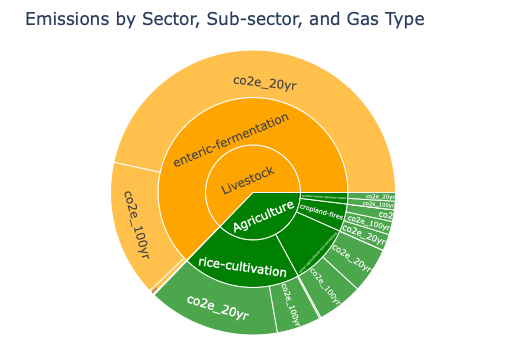

In [60]:
base_dir = Path("/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/")

# Combine datasets into one for a hierarchical view
file_paths = {
    "cropland_fires": "/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/asset_cropland-fires_emissions.csv",
    "synthetic_fertilizer": "/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/asset_synthetic-fertilizer-application-top500_emissions.csv",
    "enteric_fermentation": "/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/country_enteric-fermentation_emissions.csv",
    "manure_management": "/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/asset_manure-management_emissions.csv",
    "agricultural_soil": "/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/country_other-agricultural-soil-emissions_emissions.csv",
    "rice_cultivation": "/Users/nehanavarkar/Desktop/Sem3/INFSCI 2415 - INFORMATION VISUALIZATION/IV_Project/dataset_emission/agriculture/country_rice-cultivation_emissions.csv"
}

# Load datasets and add a column for sector
datasets = {
    "Cropland Fires": pd.read_csv(file_paths["cropland_fires"]).assign(Sector="Agriculture"),
    "Synthetic Fertilizer": pd.read_csv(file_paths["synthetic_fertilizer"]).assign(Sector="Agriculture"),
    "Enteric Fermentation": pd.read_csv(file_paths["enteric_fermentation"]).assign(Sector="Livestock"),
    "Manure Management": pd.read_csv(file_paths["manure_management"]).assign(Sector="Livestock"),
    "Agricultural Soil": pd.read_csv(file_paths["agricultural_soil"]).assign(Sector="Agriculture"),
    "Rice Cultivation": pd.read_csv(file_paths["rice_cultivation"]).assign(Sector="Agriculture")
}

# Combine all datasets
combined_data = pd.concat(datasets.values())

# Group data by Sector > Sub-sector > Gas for hierarchy
sunburst_data = combined_data.groupby(
    ['Sector', 'original_inventory_sector', 'gas']
)['emissions_quantity'].sum().reset_index()

# Create a Sunburst Chart
fig = px.sunburst(
    sunburst_data,
    path=['Sector', 'original_inventory_sector', 'gas'],  # Hierarchical path
    values='emissions_quantity',  # Size of segments
    color='Sector',  # Color by sector
    title="Emissions by Sector, Sub-sector, and Gas Type",
    color_discrete_map={
        "Agriculture": "green",
        "Livestock": "orange",
        "Waste": "blue",
        "Energy": "red"
    }
)

# Customize layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show the chart
fig.show()


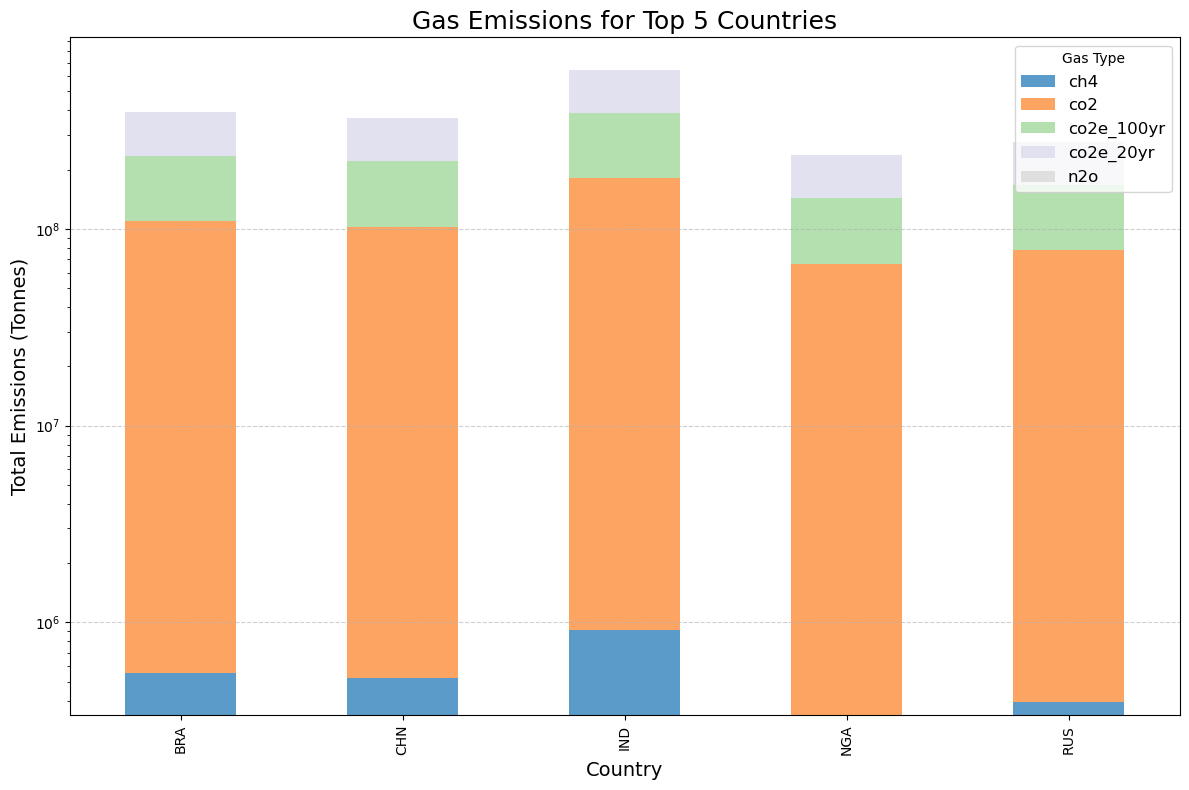

In [36]:
# Summarize emissions by country and gas type for the top 5 countries
top_5_countries = top_countries['iso3_country'].head(5)
top_5_gas_emissions = top_countries_data[top_countries_data['iso3_country'].isin(top_5_countries)]

# Aggregate emissions by country and gas
gas_emissions_by_country = top_5_gas_emissions.groupby(['iso3_country', 'gas']).agg(
    total_emissions=('emissions_quantity', 'sum')
).reset_index()

# Pivot data for stacked bar chart
gas_emissions_pivot = gas_emissions_by_country.pivot(
    index='iso3_country', columns='gas', values='total_emissions'
).fillna(0)

# # Create a stacked bar chart
# fig, ax = plt.subplots(figsize=(12, 8))
# gas_emissions_pivot.plot(
#     kind='bar', 
#     stacked=True, 
#     ax=ax, 
#     colormap='tab20c', 
#     alpha=0.8
# )

# # Add labels, legend, and title
# ax.set_title("Gas Emissions for Top 5 Countries", fontsize=18)
# ax.set_xlabel("Country", fontsize=14)
# ax.set_ylabel("Total Emissions (Tonnes)", fontsize=14)
# ax.legend(title="Gas Type", fontsize=12, loc='upper right')
# ax.grid(axis='y', linestyle='--', alpha=0.6)

# plt.tight_layout()
# plt.show()


# Adjust scaling to improve visibility of all gases in the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Replot with better scaling for all gases
gas_emissions_pivot.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='tab20c',
    alpha=0.8
)

# Add labels, legend, and title
ax.set_title("Gas Emissions for Top 5 Countries", fontsize=18)
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Total Emissions (Tonnes)", fontsize=14)
ax.set_yscale('log')  # Use logarithmic scale for better visibility
ax.legend(title="Gas Type", fontsize=12, loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


     asset_id iso3_country original_inventory_sector           start_time  \
0  1833543950          USA            cropland-fires  2015-10-01 00:00:00   
1  1833543950          USA            cropland-fires  2015-10-01 00:00:00   
2  1833543950          USA            cropland-fires  2015-10-01 00:00:00   
3  1833543950          USA            cropland-fires  2015-10-01 00:00:00   
4  1833543950          USA            cropland-fires  2015-10-01 00:00:00   

              end_time temporal_granularity         gas  emissions_quantity  \
0  2015-10-31 00:00:00                month         co2         1267.877783   
1  2015-10-31 00:00:00                month         ch4            6.470336   
2  2015-10-31 00:00:00                month         n2o            0.077028   
3  2015-10-31 00:00:00                month  co2e_100yr         1469.428755   
4  2015-10-31 00:00:00                month   co2e_20yr         1814.297675   

   emissions_factor  emissions_factor_units  capacity  capacit

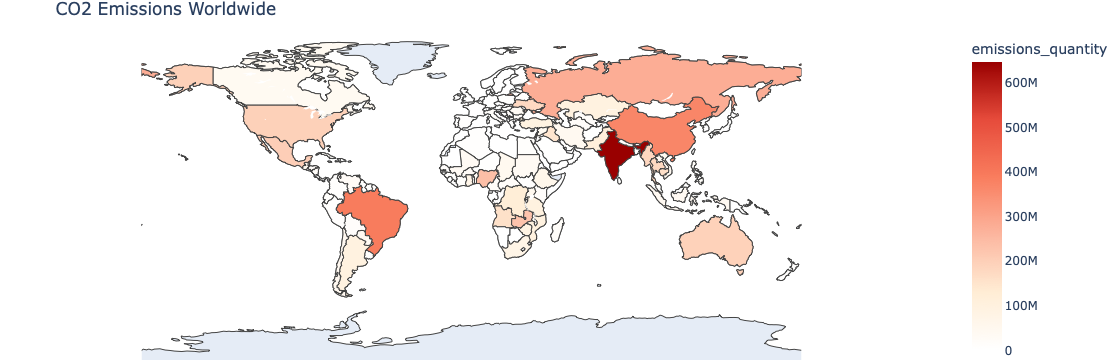